# Filtering GRIB data

In [21]:
import time
import metview as mv

## read() versus select()

Metview provides two ways to filter GRIB messages. Here is a quick comparison:

* [**read()**](../api/functions/read.rst):
  * works with GRIB data from ECMWF's archive, MARS
  * uses the same keywords as retrieve()
  * includes area cropping, spectral transforms and grid interpolation
  * has an equivalent icon in the graphical user interface, "GRIB Filter"
  * filtering may not by fully functional with non-MARS GRIB data

* [**select()**](../api/functions/select.rst):
  * works with any GRIB data that ecCodes understands
  * uses ecCodes keys rather than MARS keywords
  * much faster than read() when called multiple times on the same Fieldset
  * no post-processing of data (use read() or regrid() separately for that)
  * only available from Python

In [22]:
filename = "data_fc.grib"
if mv.exist(filename):
    fs = mv.read(filename)
else:
    fs = mv.gallery.load_dataset(filename)

## Inspecting the data
A separate notebook covers the details of inspecting GRIB data with Metview. Here we will use the methods to decide which fields to filter.

In [23]:
print(fs)

Fieldset (288 fields)


In [24]:
fs.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
q,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",133,od,oper,fc,0001
t,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",130,od,oper,fc,0001
tp,surface,0,20111215,0,"0,6,...",228,od,oper,fc,0001
u,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",131,od,oper,fc,0001
v,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",132,od,oper,fc,0001
z,isobaricInhPa,"100,250,...",20111215,0,"0,6,...",129,od,oper,fc,0001


OK, let's select 't' and have a closer look at what it has.

In [25]:
fs.describe('t')

shortName,t
name,Temperature
paramId,130
units,K
typeOfLevel,isobaricInhPa
level,"100,250,300,500,700,850,1000"
date,20111215
time,0
step,"0,6,12,18,24,30,36,42"
class,od
stream,oper


We have 8 forecast steps over 7 levels. We will make three selections:

* temperature at all fc steps for one level
* temperature at all fc steps for three levels
* temperature at two fc steps and three levels for a specific date

## Filtering with read()

In [26]:
# temperature at all fc steps for one level
t_one = mv.read(data=fs, param='t', levelist=500)
t_one.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,500,20111215,0,0,fc,regular_ll
1,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
2,ecmf,t,isobaricInhPa,500,20111215,0,12,fc,regular_ll
3,ecmf,t,isobaricInhPa,500,20111215,0,18,fc,regular_ll
4,ecmf,t,isobaricInhPa,500,20111215,0,24,fc,regular_ll
5,ecmf,t,isobaricInhPa,500,20111215,0,30,fc,regular_ll
6,ecmf,t,isobaricInhPa,500,20111215,0,36,fc,regular_ll
7,ecmf,t,isobaricInhPa,500,20111215,0,42,fc,regular_ll


In [27]:
# temperature at all fc steps for three levels
t_three = mv.read(data=fs, param='t', levelist=[100, 300, 500])
t_three.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,500,20111215,0,0,fc,regular_ll
1,ecmf,t,isobaricInhPa,300,20111215,0,0,fc,regular_ll
2,ecmf,t,isobaricInhPa,100,20111215,0,0,fc,regular_ll
3,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
4,ecmf,t,isobaricInhPa,300,20111215,0,6,fc,regular_ll
5,ecmf,t,isobaricInhPa,100,20111215,0,6,fc,regular_ll
6,ecmf,t,isobaricInhPa,500,20111215,0,12,fc,regular_ll
7,ecmf,t,isobaricInhPa,300,20111215,0,12,fc,regular_ll
8,ecmf,t,isobaricInhPa,100,20111215,0,12,fc,regular_ll


In [28]:
# temperature at two fc steps and three levels for a specific date
t_date = mv.read(data=fs, param='t', levelist=[100, 300, 500], step=[6, 24], date=20111215)
t_date.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
1,ecmf,t,isobaricInhPa,300,20111215,0,6,fc,regular_ll
2,ecmf,t,isobaricInhPa,100,20111215,0,6,fc,regular_ll
3,ecmf,t,isobaricInhPa,500,20111215,0,24,fc,regular_ll
4,ecmf,t,isobaricInhPa,300,20111215,0,24,fc,regular_ll
5,ecmf,t,isobaricInhPa,100,20111215,0,24,fc,regular_ll


## Filtering with select()

In [29]:
# temperature at all fc steps for one level
t_one = fs.select(shortName='t', level=500)
t_one.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,500,20111215,0,0,fc,regular_ll
1,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
2,ecmf,t,isobaricInhPa,500,20111215,0,12,fc,regular_ll
3,ecmf,t,isobaricInhPa,500,20111215,0,18,fc,regular_ll
4,ecmf,t,isobaricInhPa,500,20111215,0,24,fc,regular_ll
5,ecmf,t,isobaricInhPa,500,20111215,0,30,fc,regular_ll
6,ecmf,t,isobaricInhPa,500,20111215,0,36,fc,regular_ll
7,ecmf,t,isobaricInhPa,500,20111215,0,42,fc,regular_ll


In [30]:
# temperature at all fc steps for three levels
# note that this example shows that select() performs some re-ordering of
# the fields for efficiency of filtering - compare with the equivalent read()
# example in the above section
t_three = fs.select(shortName='t', level=[100, 300, 500])
t_three.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,100,20111215,0,0,fc,regular_ll
1,ecmf,t,isobaricInhPa,300,20111215,0,0,fc,regular_ll
2,ecmf,t,isobaricInhPa,500,20111215,0,0,fc,regular_ll
3,ecmf,t,isobaricInhPa,100,20111215,0,6,fc,regular_ll
4,ecmf,t,isobaricInhPa,300,20111215,0,6,fc,regular_ll
5,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
6,ecmf,t,isobaricInhPa,100,20111215,0,12,fc,regular_ll
7,ecmf,t,isobaricInhPa,300,20111215,0,12,fc,regular_ll
8,ecmf,t,isobaricInhPa,500,20111215,0,12,fc,regular_ll


In [31]:
# temperature at two fc steps and three levels for a specific date
t_date = fs.select(shortName='t', level=[100, 300, 500], step=[6, 24], date=20111215)
t_date.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,100,20111215,0,6,fc,regular_ll
1,ecmf,t,isobaricInhPa,300,20111215,0,6,fc,regular_ll
2,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
3,ecmf,t,isobaricInhPa,100,20111215,0,24,fc,regular_ll
4,ecmf,t,isobaricInhPa,300,20111215,0,24,fc,regular_ll
5,ecmf,t,isobaricInhPa,500,20111215,0,24,fc,regular_ll


In [32]:
# alternative: specify date using datetime
import datetime
t_date = fs.select(shortName='t', level=[100, 300, 500], step=[6, 24], date=datetime.datetime(2011, 12, 15, 0, 0))
t_date.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,t,isobaricInhPa,100,20111215,0,6,fc,regular_ll
1,ecmf,t,isobaricInhPa,300,20111215,0,6,fc,regular_ll
2,ecmf,t,isobaricInhPa,500,20111215,0,6,fc,regular_ll
3,ecmf,t,isobaricInhPa,100,20111215,0,24,fc,regular_ll
4,ecmf,t,isobaricInhPa,300,20111215,0,24,fc,regular_ll
5,ecmf,t,isobaricInhPa,500,20111215,0,24,fc,regular_ll


## Performance
Now we will compare the performance of these two methods and see how they differ when called multiple times on the same data. Imagine that we will want to compute a temporal mean for each level. To do that, we will loop over the levels and select all the forecast steps for each. We will enhance that code by adding timings, and by running the code multiple times, each time taking one more level into account.

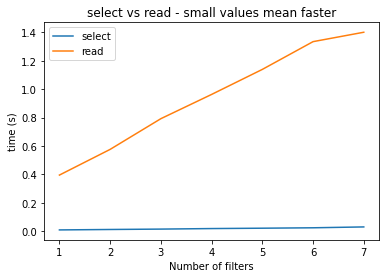

In [33]:
def filter_n_times(n, use_select):
    levs = all_levels[0:n+1]
    for lev in levs:
        if use_select:
            a = fs.select(shortName='t', level=lev).count()
        else:
            a = mv.read(data=fs, param='t', levelist=lev).count()


# find the list of all levels
t_one_step = fs.select(shortName='t', step=0)
all_levels = t_one_step.grib_get_double('level')
num_levels = len(all_levels)

nlevs = []
times_read = []
times_select = []

for n in range(1, num_levels+1):
    nlevs.append(n)
    time1 = time.perf_counter()
    filter_n_times(n, use_select=True)
    timediff = time.perf_counter() - time1
    times_select.append(timediff)

    time1 = time.perf_counter()
    filter_n_times(n, use_select=False)
    timediff = time.perf_counter() - time1
    times_read.append(timediff)

import matplotlib.pyplot as plt

plt.plot(nlevs, times_select, label="select")
plt.plot(nlevs, times_read, label="read")
plt.xlabel("Number of filters")
plt.ylabel("time (s)")
plt.legend(loc='upper left')
plt.title('select vs read - small values mean faster')

plt.show()

The performance differences are due to the fact that [select()](../api/functions/select.rst) caches its Fieldset indexes so that further filtering on the same Fieldset should be faster.